# Task 3: Optimization and new Baseline Model

After the feedback we got from Task 2, we did a little bit of reworking to optimize our linear regression Model, before we 
tackle Task 3.

Some of our Optimization includes:

    -Removed temp and kept atemp during feature selection, as using both would create issues with multicorrelation.
    -remove the 'casual' and 'registered' labels, because we only use 'cnt'
    -checked out how 'mnth' is distributed ? (Anectode from the lecture)
    -kept 'instant', because its relevant apparently
    
Since we changed our dataset, we also tested our Models again to compare if the Model improved.

<div style="width:100%;height:30px;background-color:#E31134"></div>
    

## 0. Importing Requirements

In [1]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [2]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 1.1. Minimal Preprocessing

In [3]:
# Replacing all MissingValues with the most frequent values (don't make any sense, just for the working code)
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

# 'dteday' is not neccessary and breaks the code
train_df = train_df.drop('dteday', axis=1)
test_df = test_df.drop('dteday', axis=1)

### 1.2. Features/Label - Train/Test Split

In [4]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [5]:
#comment any of these out to check the content

# train_features
# train_labels
# test_features
# test_labels

### 1.3. Linear Regresion

In [6]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [7]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

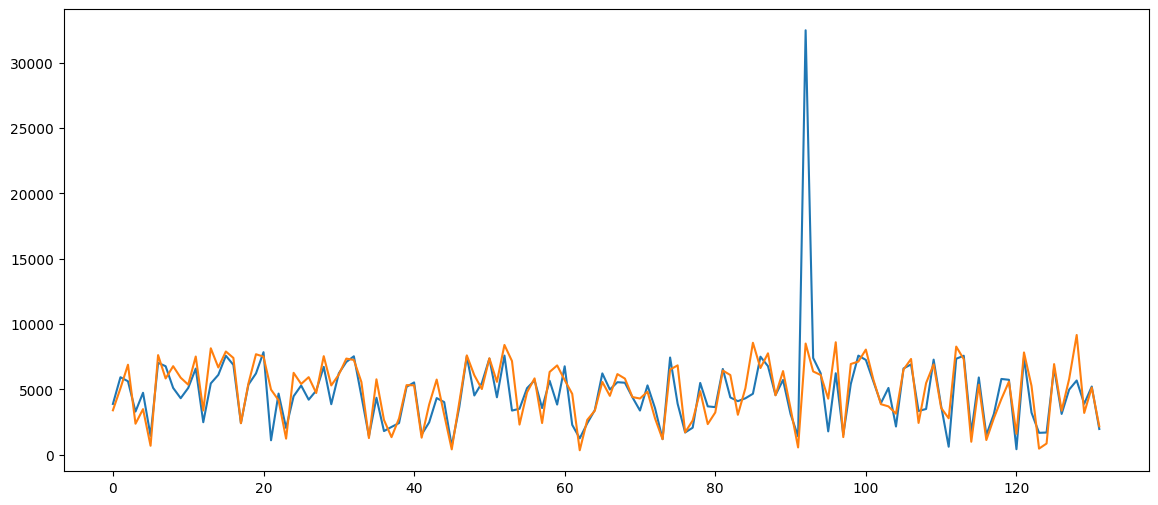

In [8]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [9]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -48700000.0
1  -84600000.0
2  126500000.0
3  -92900000.0
4 -125200000.0
5  -75400000.0
6   58900000.0
7  -93400000.0
8  166300000.0
9  156900000.0 2


### 1.4. Evaluate Baseline model

In [11]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.4001965370904248


## 2. Preprocessing

In [12]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

In [13]:
#hum has to many outliers
#windspeed has only 4 outliers, can be handled via imputation
print("Hum Outliers: ", len(train_df[train_df["hum"] > 100])) # drop / don't use later
print("Windspeed Outliers: ", len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [14]:
#replacing outliers of windspeed with the median 
for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

In [15]:
#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [16]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek

In [17]:
# remove outliers above 20k

index_names = train_df[ train_df['cnt'] > 20000 ].index 
# drop these row indexes 
# from dataFrame 
train_df = train_df.drop(index_names) 

In [18]:
#windspeed seems to be skewed, so we will normalize this feature

pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].array.reshape(-1, 1)))


train_df['windspeed']=trans_temp
#hist = train_df['windspeed'].hist(bins=20,figsize=(10, 10))

pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].values.reshape(-1, 1)))


train_df['windspeed']=trans_temp
#hist = train_df['windspeed'].hist(bins=20,figsize=(7, 7))

### 2.2. Test Data Preprocessing

In [19]:
#Again, alot of hum values are over 100, so we have some outliers here, so we drop the feature altogether
print(len(test_df[test_df["hum"] > 100]))

45


In [20]:
#fixing the missing values in the season feature with the date

for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

feature_test_df = test_df.iloc[:, :15]

In [21]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].values.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
#hist = test_df['windspeed'].hist(bins=20,figsize=(7, 7))

## 3. Feature Selection

In [22]:
#removing all features, we deemed unnecessary
train_df = train_df.drop('dteday', axis=1).drop('hum', axis=1).drop('casual', axis=1).drop('registered', axis=1).drop('temp', axis=1)
test_df = test_df.drop('dteday', axis=1).drop('hum', axis=1).drop('casual', axis=1).drop('registered', axis=1).drop('temp', axis=1)

### 3.1. Correlation

In [23]:
#calculate correlations between all features of your data frame (see Exploration lab)
train_corr = train_df.corr()

# Displaying correlations as a heatmap / correlation matrix 
train_corr.style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
instant,1.000000,0.316424,0.862785,0.478759,0.036888,-0.011933,-0.001219,0.000775,0.131830,-0.148573,-0.109148,-0.022923,0.606313
season,0.316424,1.000000,-0.033477,0.685960,-0.001416,-0.009581,-0.005619,0.032999,0.319582,-0.211800,-0.007392,-0.010487,0.348816
yr,0.862785,-0.033477,1.000000,-0.028837,0.021979,-0.025109,0.008882,-0.039531,0.028998,-0.021385,-0.080441,-0.008500,0.549341
mnth,0.478759,0.685960,-0.028837,1.000000,0.035441,0.017818,-0.020155,0.072770,0.213059,-0.258380,-0.076208,-0.026320,0.252699
holiday,0.036888,-0.001416,0.021979,0.035441,1.000000,-0.062369,-0.258964,-0.022563,-0.027784,0.015886,-0.048116,-0.046430,-0.068206
weekday,-0.011933,-0.009581,-0.025109,0.017818,-0.062369,1.000000,-0.002467,0.043374,-0.022056,0.019229,0.005699,0.055231,-0.064559
workingday,-0.001219,-0.005619,0.008882,-0.020155,-0.258964,-0.002467,1.000000,0.067185,0.050782,0.001836,0.012017,0.032606,0.059241
weathersit,0.000775,0.032999,-0.039531,0.072770,-0.022563,0.043374,0.067185,1.000000,-0.095395,0.048001,-0.020918,0.036114,-0.299036
atemp,0.131830,0.319582,0.028998,0.213059,-0.027784,-0.022056,0.050782,-0.095395,1.000000,-0.185680,0.009075,-0.016678,0.635856
windspeed,-0.148573,-0.211800,-0.021385,-0.258380,0.015886,0.019229,0.001836,0.048001,-0.185680,1.000000,-0.024513,0.039638,-0.253797


In [24]:
#calculate correlations of features to label
train_df_corr_label = train_df.iloc[:, :].corr()["cnt"]


### 3.2. Actually Feature Selection

In [25]:
# If you want to run a model with a different feature selection, 
# please comment out the selection and comment the current one.

#Model A: All the preprocessed features
#train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index]

# Model B: temp, instant, year (3 features with the highest correlation)
#train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:4]]

# Model C: temp, instant, year, season, weathersit (5 features with the highest correlation)
train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:6]]

# Model D - Forward Selection (just replace features by hand)
#train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index]
#train_corr_high = train_corr_high[['cnt','season','yr','weathersit','atemp','instant','windspeed']]



train_corr_high

,cnt,atemp,instant,yr,season,weathersit
0,5312,0.587133,154,0,2.0,1
1,5445,0.324492,685,1,4.0,2
2,2236,0.126275,368,1,1.0,1
3,6370,0.614925,472,1,2.0,1
4,7836,0.505046,442,1,1.0,2
...,...,...,...,...,...,...
595,3117,0.466525,78,0,1.0,1
596,2703,0.440642,81,0,1.0,1
597,4097,0.381938,377,1,1.0,2
598,3894,0.472846,299,0,4.0,2


## 4. New Linear Regression Model

### 4.1. Split

In [26]:
# Splitting the train data into features and labels
train_features = train_corr_high.iloc[:, 1:]
train_labels = train_corr_high.iloc[:, :1]

# Splitting the test data into features and labels
test_data = test_df[train_corr_high.columns]
test_features = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, :1]

# train_features
# train_labels
# test_features
# test_labels

### 4.2. Linear Regression

In [27]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
model = linear_model.LinearRegression()

model.fit(train_features, train_labels)

print(model.coef_)

[[ 6.31992674e+03  8.84161866e-01  1.70088333e+03  2.85289031e+02
  -8.29085208e+02]]


In [28]:
# Predict all test examples
pred = model.predict(test_features)

### 4.3. Evaluation

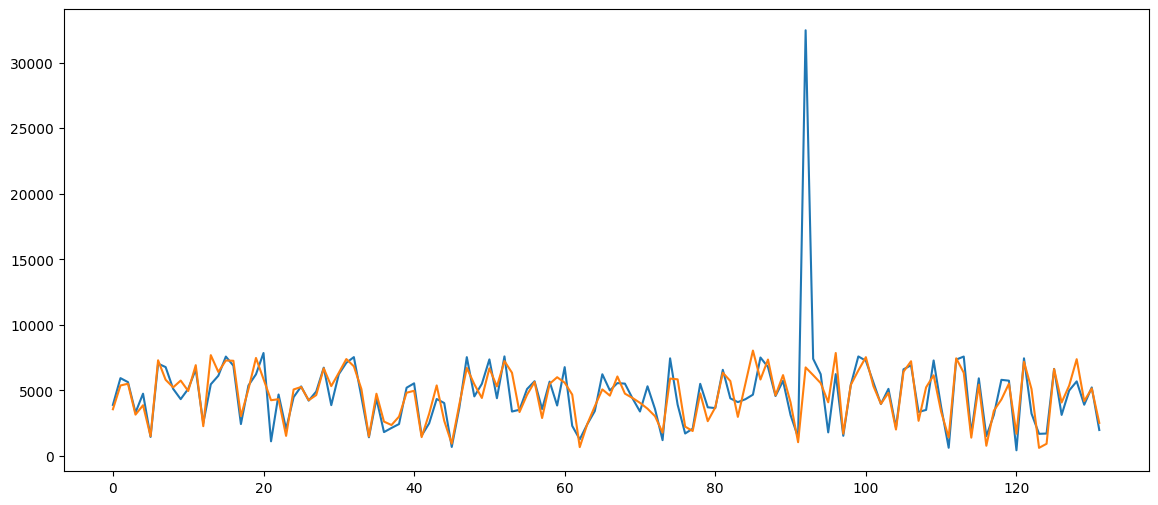

In [29]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(pred)

In [30]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", predicted_value - test_labels.iloc[0])

Predict label for following example:
atemp           0.472846
instant       299.000000
yr              0.000000
season          4.000000
weathersit      2.000000
Name: 0, dtype: float64

Predicted label:  [3560.18708843]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -333.812912
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ", model.score(test_features, test_labels))

MAE: 911.851
R^2 value of the model:  0.3804996890160657
